### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set 
### Total infected cases, total fatalities, total recovered

In [1]:
from covid_byweek import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(x_dat)

532

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'07-06-2021'

### Total CONFIRMED cases in the World changed by week


Week: 1 with lowest confirmed cases 2118.0

Week: 66 with highest confirmed cases 5784719.0

Average confirmed by Week until now:  2397553.4805194805


,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Total Confirmed changed by Week,2118.0,16787.0,40151.0,71226.0,78985.0,88368.0,109820.0,167408.0,337867.0,720010.0,...,158334377.0,163074638.0,166869511.0,170352567.0,173310870.0,175964067.0,178488818.0,181093841.0,183786481.0,184611618.0
Number of Confirmed every Week,2118.0,14669.0,23364.0,31075.0,7759.0,9383.0,21452.0,57588.0,170459.0,382143.0,...,5459856.0,4740261.0,3794873.0,3483056.0,2958303.0,2653197.0,2524751.0,2605023.0,2692640.0,825137.0


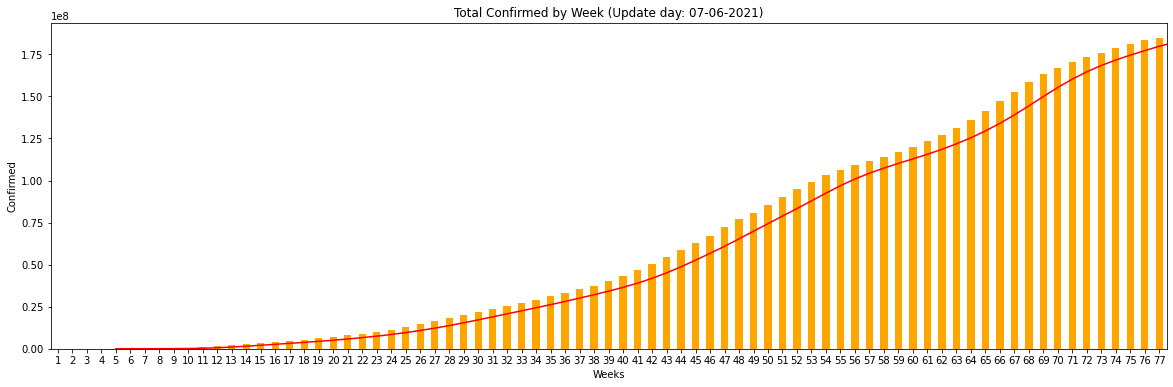

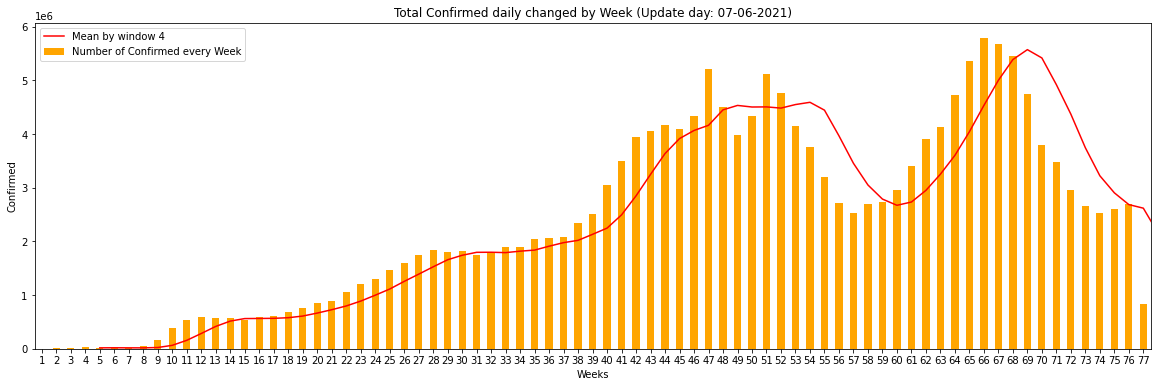

In [4]:
# time slot 4 weeks
window_slot = 4

# convert to DataFrame
x_weeks = [week for week, value in confirmedByWeek]
y_cases_total = [value for week, value in confirmedByWeek]
y_cases_byweek = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks = pd.DataFrame(columns=x_weeks, index=['Total Confirmed changed by Week', 'Number of Confirmed every Week'])
for week in weeks:
    confirmedweeks[week] = [y_cases_total[week-1], y_cases_byweek[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks.mask(confirmedweeks<0, 0, inplace=True)   

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total, color='Orange')
confirmedweeks.loc['Total Confirmed changed by Week'].plot.bar(color='orange')

roll = confirmedweeks.loc['Total Confirmed changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='red')

plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalconfirmed.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek, color='Orange')
confirmedweeks.loc['Number of Confirmed every Week'].plot.bar(color='orange')

roll = confirmedweeks.loc['Number of Confirmed every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='red')

plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed daily changed by Week (Update day: "+str(updated_date)+")")
plt.legend()
plt.savefig('output/week_totalconfirmed_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek)+1, "with lowest confirmed cases", y_cases_byweek[np.argmin(y_cases_byweek)])
print("\nWeek:", np.argmax(y_cases_byweek)+1, "with highest confirmed cases", y_cases_byweek[np.argmax(y_cases_byweek)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases_byweek))
confirmedweeks

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week


Week: 1 with lowest Fatalities cases 56.0

Week: 53 with highest Fatalities cases 101042.0

Average Fatalities by Week until now:  51859.207792207795


,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Total Fatalities changed by Week,56.0,362.0,906.0,1770.0,2469.0,2996.0,3805.0,6445.0,14663.0,34068.0,...,3402170.0,3490414.0,3576765.0,3655647.0,3728668.0,3804451.0,3866355.0,3923128.0,3977133.0,3993159.0
Number of Fatalities every Week,56.0,306.0,544.0,864.0,699.0,527.0,809.0,2640.0,8218.0,19405.0,...,93312.0,88244.0,86351.0,78882.0,73021.0,75783.0,61904.0,56773.0,54005.0,16026.0


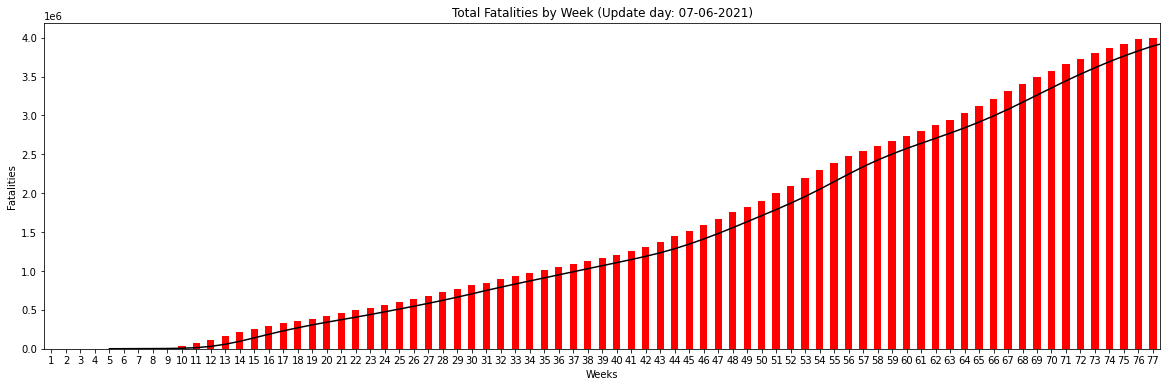

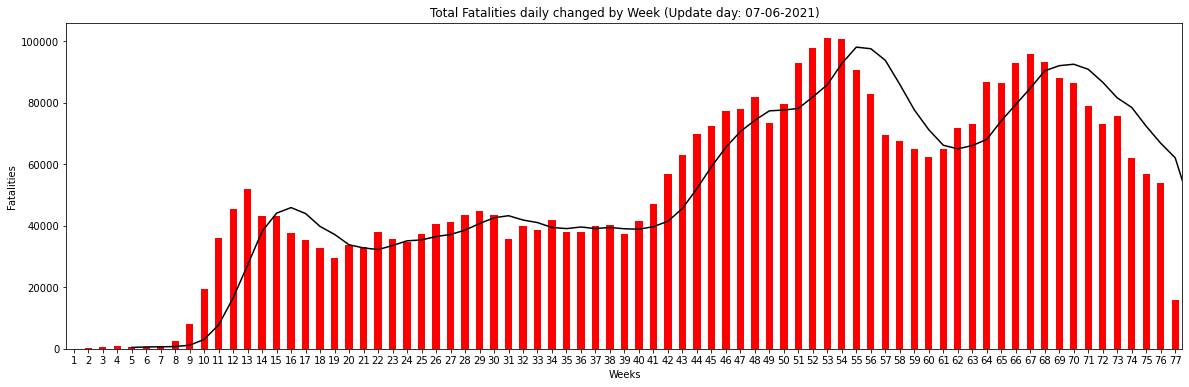

In [5]:
# convert to DataFrame
x_weeks = [week for week, value in deathsByWeek]
y_cases_total_deaths = [value for week, value in deathsByWeek]
y_cases_byweek_deaths = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_deaths = pd.DataFrame(columns=x_weeks, index=['Total Fatalities changed by Week', 'Number of Fatalities every Week'])
for week in weeks:
    confirmedweeks_deaths[week] = [y_cases_total_deaths[week-1], y_cases_byweek_deaths[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks_deaths.mask(confirmedweeks_deaths<0, 0, inplace=True)        

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total_deaths, color='Red')
confirmedweeks_deaths.loc['Total Fatalities changed by Week'].plot.bar(color='red')

roll = confirmedweeks_deaths.loc['Total Fatalities changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='black')

plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek_deaths, color='Red')
confirmedweeks_deaths.loc['Number of Fatalities every Week'].plot.bar(color='red')

roll = confirmedweeks_deaths.loc['Number of Fatalities every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='black')
    
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_deaths)+1, "with lowest Fatalities cases", y_cases_byweek_deaths[np.argmin(y_cases_byweek_deaths)])
print("\nWeek:", np.argmax(y_cases_byweek_deaths)+1, "with highest Fatalities cases", y_cases_byweek_deaths[np.argmax(y_cases_byweek_deaths)])
print("\nAverage Fatalities by Week until now: ", np.mean(y_cases_byweek_deaths))
confirmedweeks_deaths

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week


Week: 59 with lowest Recovered cases -9051971.0

Week: 68 with highest Recovered cases 4759410.0

Average Recovered by Week until now:  1578740.4935064935


,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Total Recovered changed by Week,56.0,476.0,3245.0,10866.0,23394.0,42717.0,60695.0,76033.0,97225.0,149062.0,...,94371825.0,99064469.0,103620280.0,107630598.0,111146372.0,113993656.0,116446787.0,118678808.0,120868182.0,121563018.0
Number of Recovered every Week,56.0,420.0,2769.0,7621.0,12528.0,19323.0,17978.0,15338.0,21192.0,51837.0,...,4759410.0,4692644.0,4555811.0,4010318.0,3515774.0,2847284.0,2453131.0,2232021.0,2189374.0,694836.0


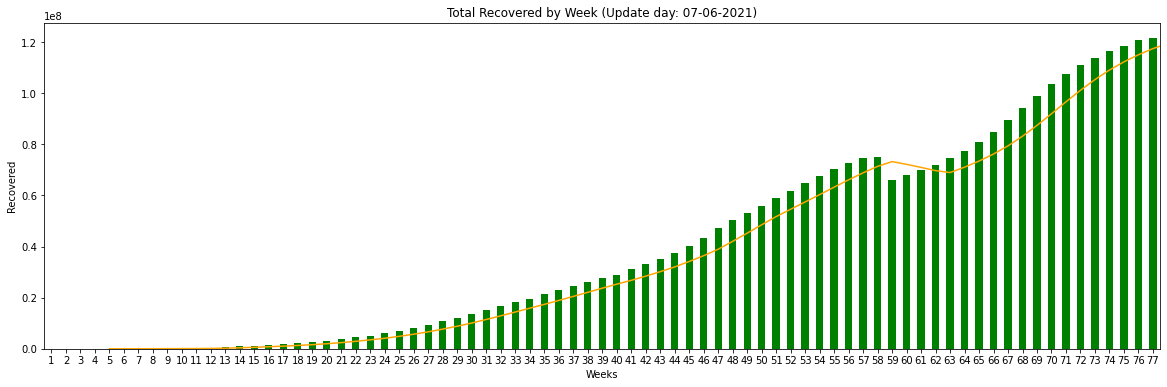

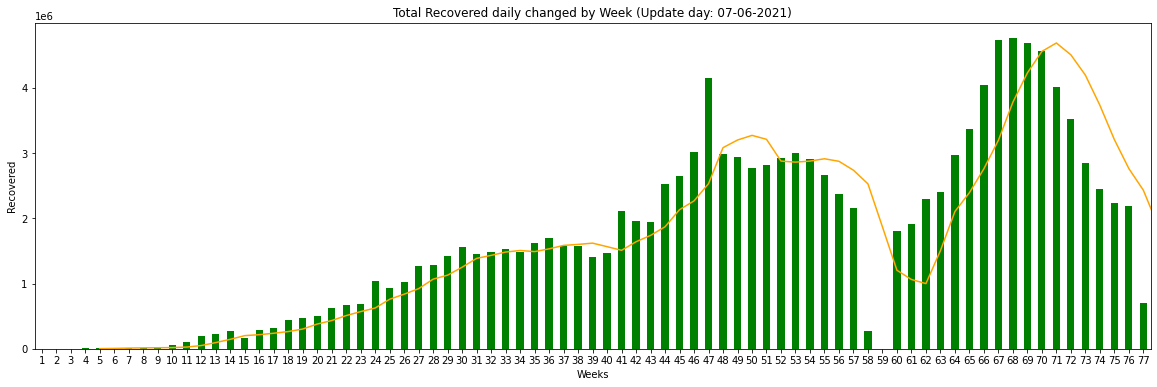

In [6]:
# convert to DataFrame
x_weeks = [week for week, value in recoveredByWeek]
y_cases_total_recovered = [value for week, value in recoveredByWeek]
y_cases_byweek_recovered = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_recovered = pd.DataFrame(columns=x_weeks, index=['Total Recovered changed by Week', 'Number of Recovered every Week'])
for week in weeks:
    confirmedweeks_recovered[week] = [y_cases_total_recovered[week-1], y_cases_byweek_recovered[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks_recovered.mask(confirmedweeks_recovered<0, 0, inplace=True)
    
# Plot total recovered
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total_recovered, color='Green')
confirmedweeks_recovered.loc['Total Recovered changed by Week'].plot.bar(color='Green')

roll = confirmedweeks_recovered.loc['Total Recovered changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')

plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalrecovered.jpg')

# Plot number of recovered every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek_recovered, color='Green')
confirmedweeks_recovered.loc['Number of Recovered every Week'].plot.bar(color='Green')

roll = confirmedweeks_recovered.loc['Number of Recovered every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')

plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalrecovered_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_recovered)+1, "with lowest Recovered cases", y_cases_byweek_recovered[np.argmin(y_cases_byweek_recovered)])
print("\nWeek:", np.argmax(y_cases_byweek_recovered)+1, "with highest Recovered cases", y_cases_byweek_recovered[np.argmax(y_cases_byweek_recovered)])
print("\nAverage Recovered by Week until now: ", np.mean(y_cases_byweek_recovered))
confirmedweeks_recovered

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Since 03.2021 there was no recovered data in US. 
### More Information, see: 
### https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us
### https://github.com/CSSEGISandData/COVID-19/issues/3464